# Data Analysis - [`nlp-test-neoway`]

> This document contains the main findings regarding the behavior of the B2W-Reviews01 dataset, which contains features and data descriptive of product
reviews and with potential predictive capabilities.

### Summary
This corpus is a set of product reviews submitted to Americanas.com from January through May, 2018.

B2W-Reviews01 has both the review text and the meta-data related to each review: dates and times, 

ratings, geographical locations and ages of reviewers. 

## 1. Libraries

In [1]:
# Standard libs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ydata_profiling import ProfileReport
import plotly.express as px
import joypy
import geopandas as gpd

sns.set_theme()
sns.set(palette="deep", color_codes=True)

# Utilities

# DataPrep

# Modeling

## 2. Overview of the data
### 2.1 Reading the data

In [2]:
df = pd.read_csv('../data/raw/B2W-Reviews01.csv')
df.head(5)

/tmp/ipykernel_117724/2255767118.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/B2W-Reviews01.csv')


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [3]:
df['submission_date'] = pd.to_datetime(df.submission_date, format='%Y-%m-%d %H:%M:%S')

### 2.2 Overview

In [4]:
# Utility functions to get an overview of the data

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent (%)'])
    return missing_values[missing_values['Missing_Number']>0]

def oveview(df):
    print("Shape:", df.shape, '\n') 
    print('----------------------------------------')
    print(df.info(), '\n')
    print('----------------------------------------')
    print("Number of Uniques:\n", df.nunique(),'\n')
    print('----------------------------------------')
    print("Missing Values:\n", missing_values(df),'\n')
    print('----------------------------------------')
    print("All Columns:", list(df.columns),'\n')

In [5]:
oveview(df)

Shape: (132373, 14) 

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   submission_date        132373 non-null  datetime64[ns]
 1   reviewer_id            132373 non-null  object        
 2   product_id             132373 non-null  object        
 3   product_name           132289 non-null  object        
 4   product_brand          40982 non-null   object        
 5   site_category_lv1      132367 non-null  object        
 6   site_category_lv2      128360 non-null  object        
 7   review_title           132071 non-null  object        
 8   overall_rating         132373 non-null  int64         
 9   recommend_to_a_friend  132355 non-null  object        
 10  review_text            129098 non-null  object        
 11  reviewer_birth_year    126389 non-null  f

In [6]:
df.describe(include='all', datetime_is_numeric=True)

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
count,132373,132373,132373.0,132289,40982,132367,128360,132071,132373.000000,132355,129098,126389.000000,128237,128382
unique,NaN,112993,55930.0,47363,1062,54,713,56555,NaN,2,126724,NaN,2,27
top,NaN,6ca0a1b3fa3b50ffa21e61a01633fd785172ebb04268d1...,128010777.0,Smartphone Motorola Moto G 5S Dual Chip Androi...,samsung,Celulares e Smartphones,Smartphone,Muito bom,NaN,Yes,Entrega super rápida . Parabéns pela agilida...,NaN,M,SP
freq,NaN,155,428.0,792,6015,20859,17679,3018,NaN,96368,57,NaN,66166,49207
mean,2018-03-16 22:51:34.101742848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.492004,NaN,NaN,1977.495898,NaN,NaN
min,2018-01-01 00:11:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,59.000000,NaN,NaN
25%,2018-01-29 07:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1969.000000,NaN,NaN
50%,2018-03-22 05:48:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,1980.000000,NaN,NaN
75%,2018-04-24 08:47:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,1987.000000,NaN,NaN
max,2018-05-31 23:50:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,2018.000000,NaN,NaN


**Insights:**
- ~ 70% null entries for 'product_brand'
- Number of different product_id and product_name are different, maybe there is some mistake in this labelling 
- ~ 2,5% didn't write review_text but only 0,22% didn't write review_title
- Most important structured features apparently: *site_category_lv1, overall_rating, recommend_to_a_friend, reviewer_birth_year, reviewer_gender, reviewer_state*
- Only overall_rating and reviewer_birth_year are numerical features
- Only 5 months of data

**Decision Making:**
- 'reviewer_id' and 'product_id' will be ignored since they are database ids
- 'product_brand' probably doesn't worth deeply evaluating

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Cleaning data:**
- duplicate rows
- overall_rating has no null values and recommend_to_a_friend has a minimum number, hence cleaning null rows requires further analysis
- reviewer_birth_year has wrong entries

### 2.3 Basic data cleaning data for features investigation

In [8]:
df_features = df.copy()
df_features.reviewer_birth_year.describe()

count    126389.000000
mean       1977.495898
std          21.895265
min          59.000000
25%        1969.000000
50%        1980.000000
75%        1987.000000
max        2018.000000
Name: reviewer_birth_year, dtype: float64

In [9]:
# Clean wrong birth_year entry

df_features = df_features[(df_features['reviewer_birth_year'] > 1900) | pd.isna(df_features['reviewer_birth_year'])] 
print(df_features.reviewer_birth_year.describe()) 

df_features_shape = df_features.shape[0]
print('\n', '----------------------------------------', '\n')
print(f'Number of rows removed: {df.shape[0] - df_features_shape}')

count    126355.000000
mean       1977.675692
std          12.772624
min        1905.000000
25%        1969.000000
50%        1980.000000
75%        1987.000000
max        2018.000000
Name: reviewer_birth_year, dtype: float64

 ---------------------------------------- 

Number of rows removed: 34


In [10]:
# Clean duplicates

df_features.drop_duplicates(inplace=True)
print(f'Number of rows removed: {df_features_shape - df_features.shape[0]}')

Number of rows removed: 955


## 3. Exploratory Data Analysis
#### 3.1 Coverage of problem's scope

Describe whether your datasets contain enough samples in regions of the space that can cover the entire problem scope.

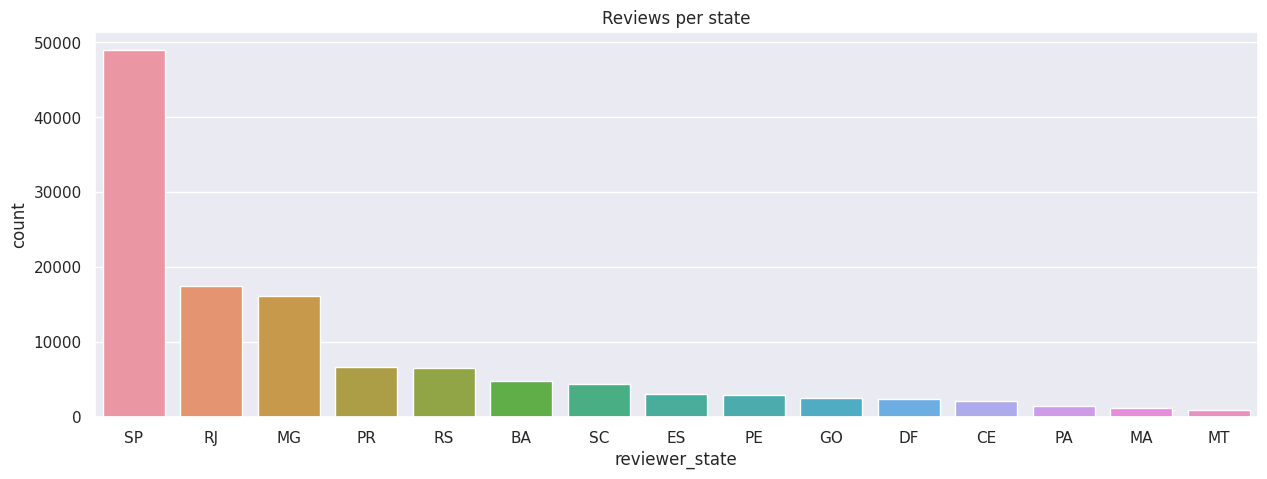

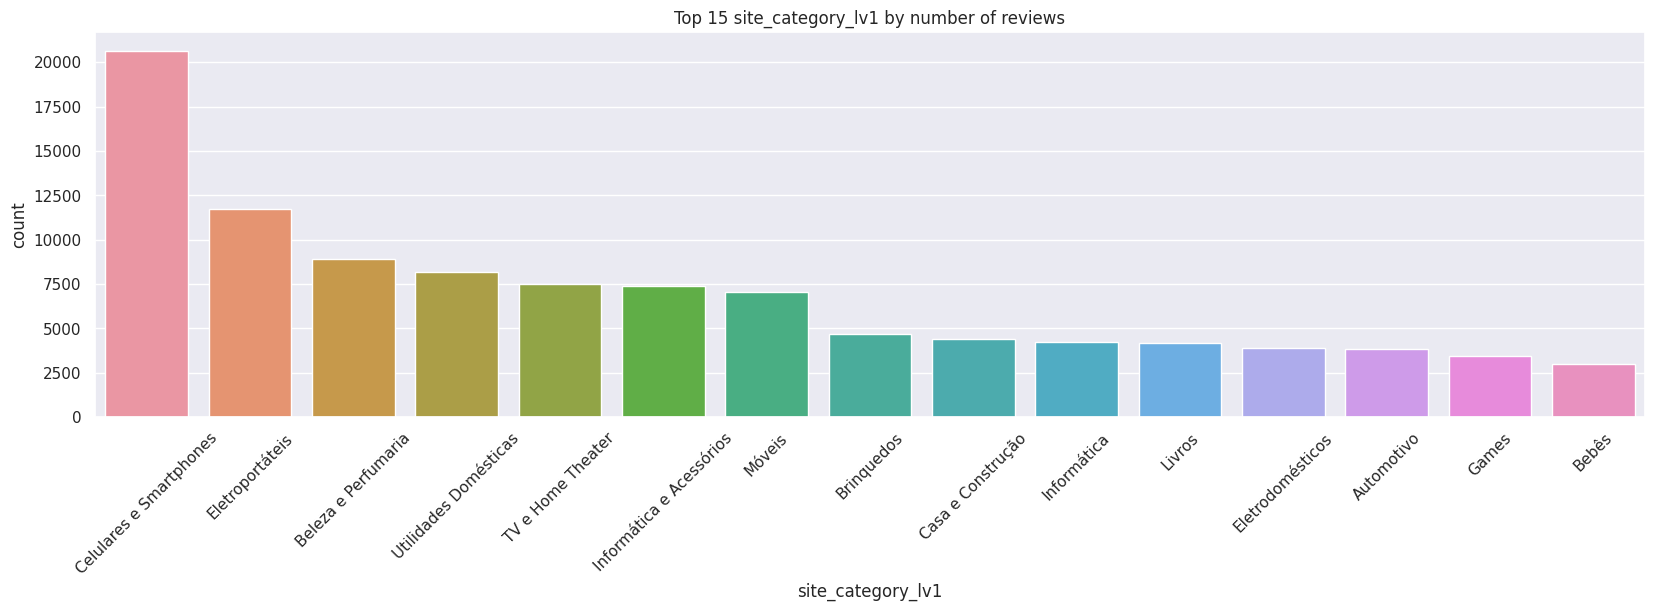

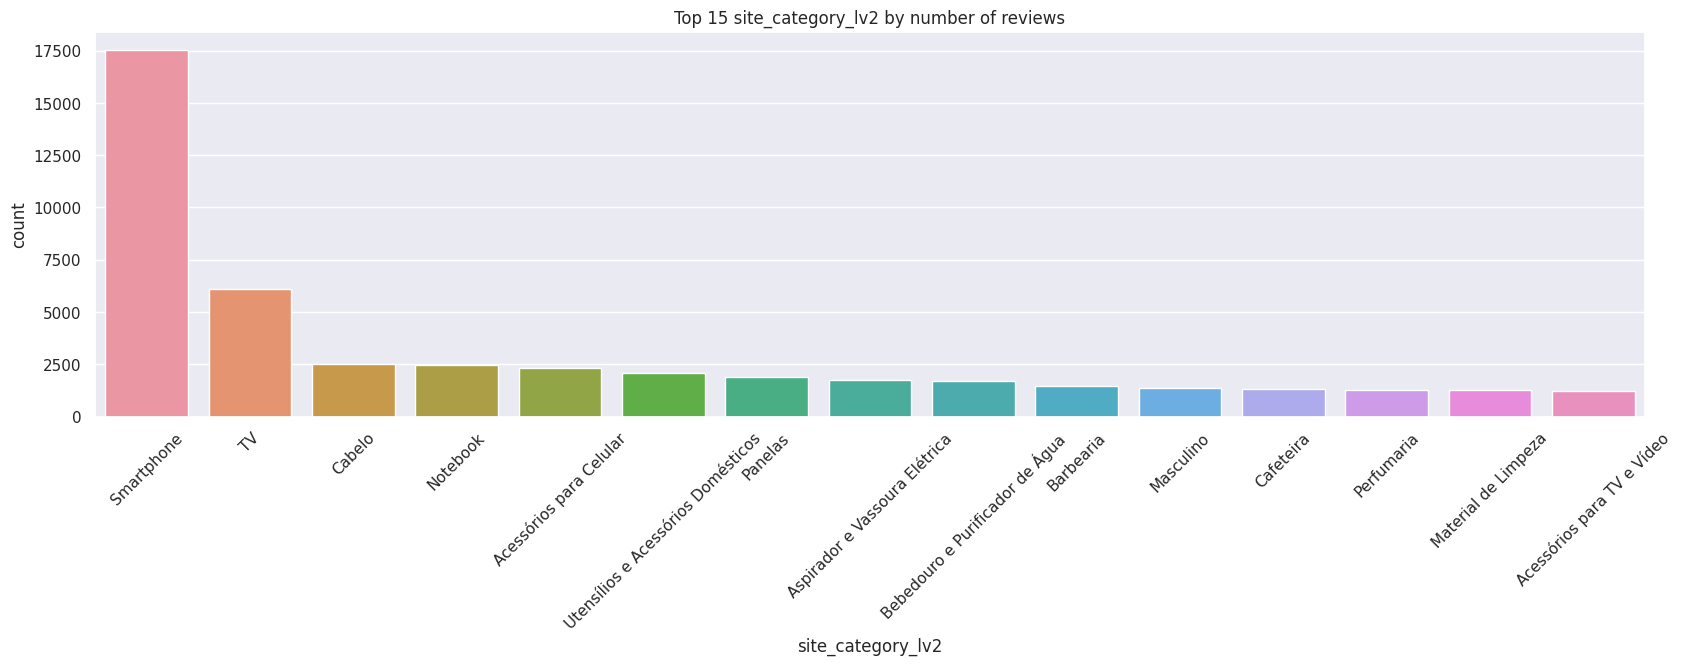

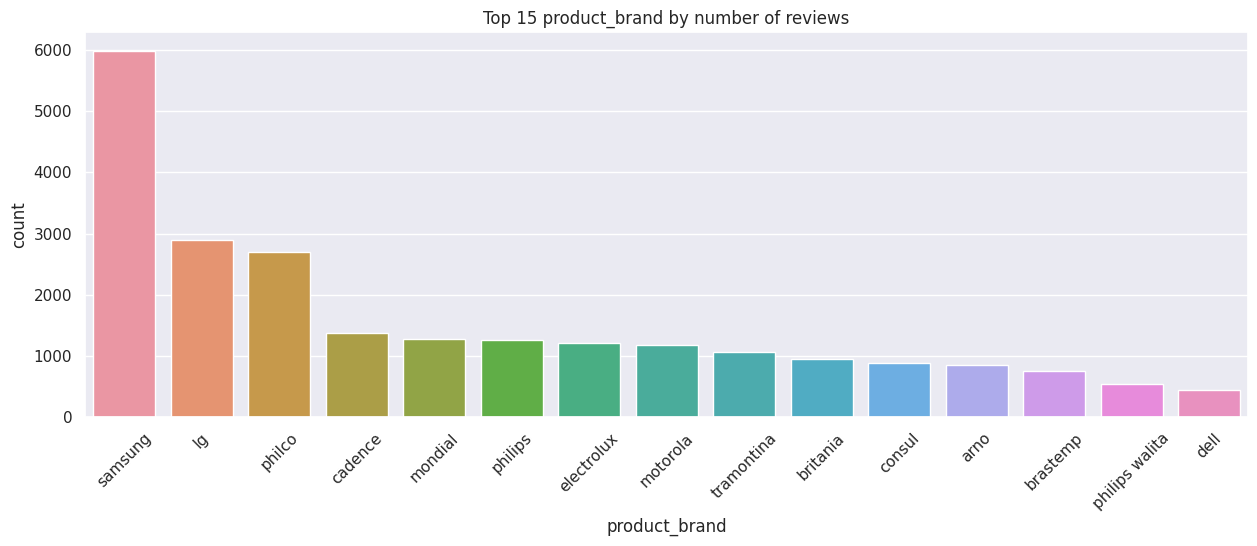

In [11]:
def plot_ranking(df, column, title, rotate=True, number_of_values=15, figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize) 
    # drawing the plot
    sns.countplot(x=column,
                data=df,
                order=df[column].value_counts().iloc[:number_of_values].index, 
                ax=ax).set(title=title)
    if rotate:
        plt.xticks(rotation=45)
    plt.show()

plot_ranking(df_features, 'reviewer_state', 'Reviews per state', rotate=False)
plot_ranking(df_features, 'site_category_lv1', 'Top 15 site_category_lv1 by number of reviews', figsize=(20, 5))
plot_ranking(df_features, 'site_category_lv2', 'Top 15 site_category_lv2 by number of reviews', figsize=(20, 5))
plot_ranking(df_features, 'product_brand', 'Top 15 product_brand by number of reviews')

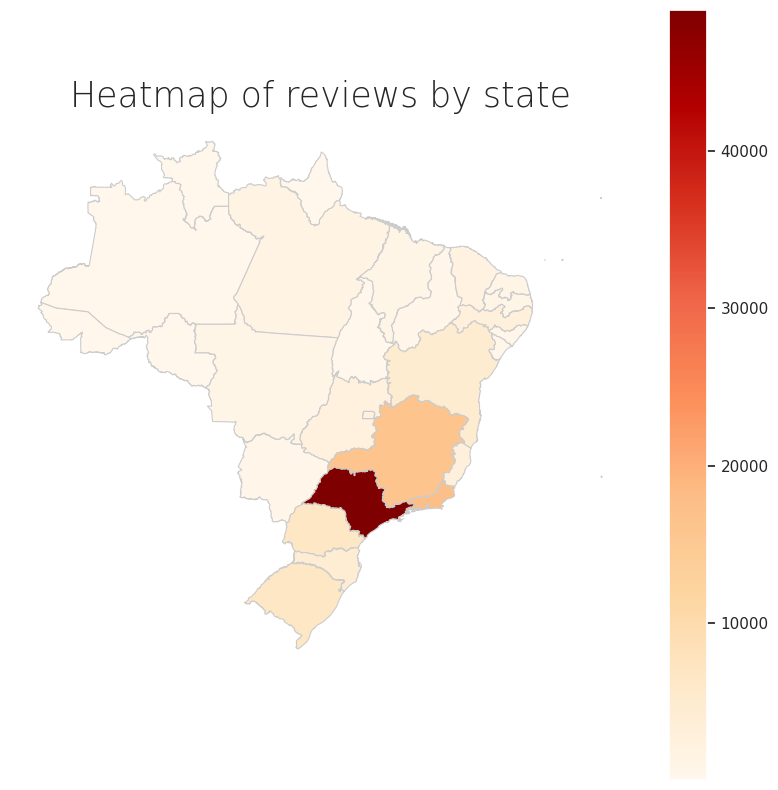

In [179]:
# Add file with map
shapefile_path = './bcim_2016_21_11_2018.gpkg'
brazil_states = gpd.read_file(shapefile_path, layer='lim_unidade_federacao_a')
states = pd.DataFrame(df_features['reviewer_state'].value_counts().sort_index())

def plot_heatmap(df_data, column, title, shapefile=brazil_states):
    # Create dataframe with the count of review per state
    data_with_states = shapefile.merge(df_data, left_on="sigla", right_on=df_data.index)
    fig, ax = plt.subplots(figsize=(10, 10))
    data_with_states.plot(column=column, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.axis('off')

    # Add a title to the plot
    plt.title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    plt.show()

plot_heatmap(states, column='reviewer_state', title='Heatmap of reviews by state')

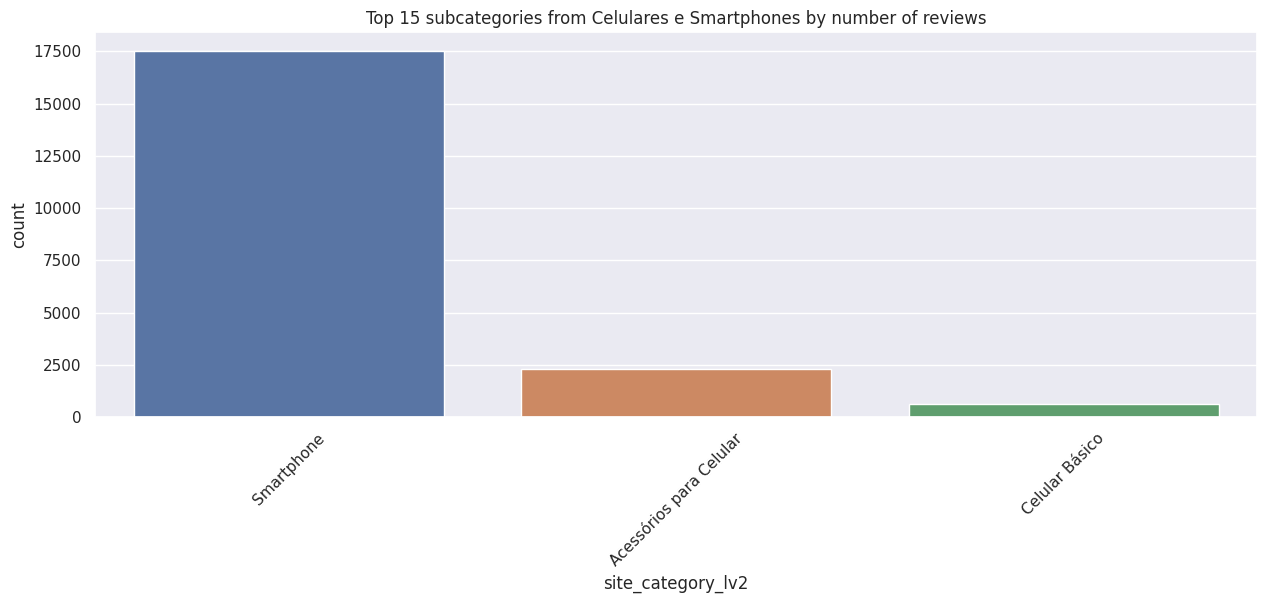

In [12]:
# Plot top subcategories inside "celulares-e-smartphones"
data_cels_n_smarts = df_features[df_features['site_category_lv1'] == 'Celulares e Smartphones']
plot_ranking(data_cels_n_smarts, 'site_category_lv2', 'Top 15 subcategories from Celulares e Smartphones by number of reviews', number_of_values=3)

In [13]:
# Share of Smartphone reviews from the website

smartphone_reviews = df_features['site_category_lv2'].value_counts().loc['Smartphone']
total_reviews = len(df_features)

print(f'Smartphone reviews represent {smartphone_reviews/total_reviews*100:.2f}% of the total reviews from the website') 

Smartphone reviews represent 13.34% of the total reviews from the website


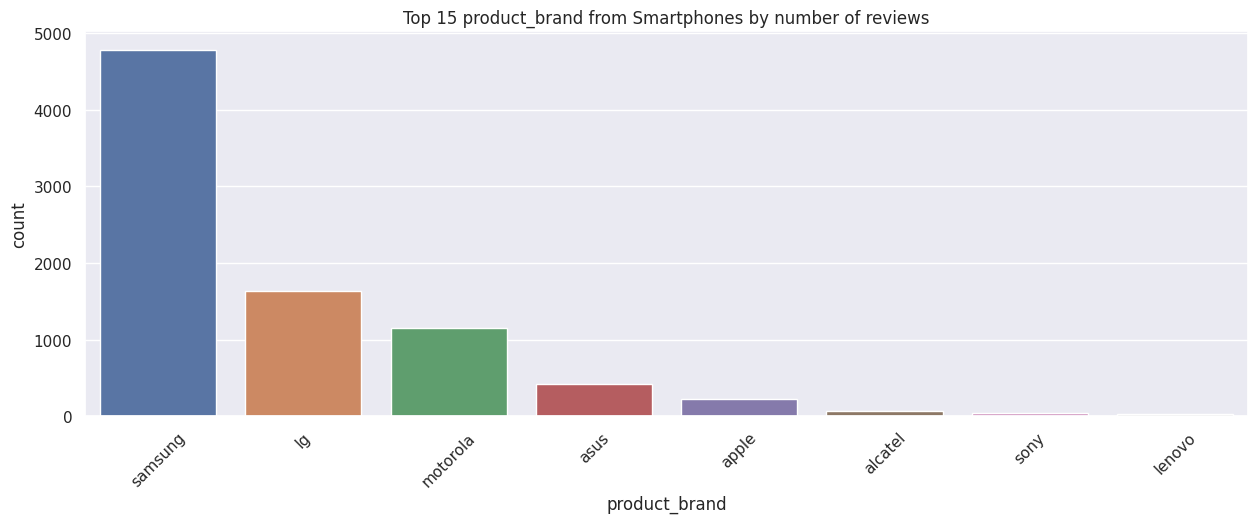

In [14]:
# Print top subcategories inside "celulares-e-smartphones"

data_smarts = df_features[df_features['site_category_lv2'] == 'Smartphone']
plot_ranking(data_smarts, 'product_brand', 'Top 15 product_brand from Smartphones by number of reviews', number_of_values=8)

In [15]:
# representativeness of product_brand from 'Smartphones' 
missing_number = data_smarts.isnull().sum().sort_values(ascending=False)
missing_percent = 100*missing_number.loc['product_brand']/len(data_smarts)
print(f'product_brand is missing in {missing_percent:.2f}% of the reviews from Smartphones')

# Share of product_brand from 'Smartphones' 
samsung_smart_reviews = data_smarts['product_brand'].value_counts().loc['samsung']
valid_reviews = len(data_smarts) - missing_number.loc['product_brand']
print(f'Samsung reviews represent {samsung_smart_reviews/valid_reviews*100:.2f}% of the total valid reviews from Smartphones')


product_brand is missing in 51.93% of the reviews from Smartphones
Samsung reviews represent 56.77% of the total valid reviews from Smartphones


**Insights:**
- Reviews are concentrated in *SP*, logarithmically decreasing in other states (3% of data NaN)
    - There is a cluster of most reviews in the south and southeast regions
- Reviews are concentrated in *Celulares e Smartphones*, **slowly** logarithmically decreasing in other site_category_lv1 (0.004% of data NaN)
- Reviews are concentrated in *Smartphones*, **fast** logarithmically decreasing in other site_category_lv2 (3% of data NaN)
    - Smartphone reviews represent 13.34% of the total reviews from the website
- Reviews are concentrated in *Samsung*, logarithmically decreasing in other product_brand (70% of data NaN)
    - Samsung reviews represent 56.71% of the total valid reviews from Smartphones (52% of data NaN)

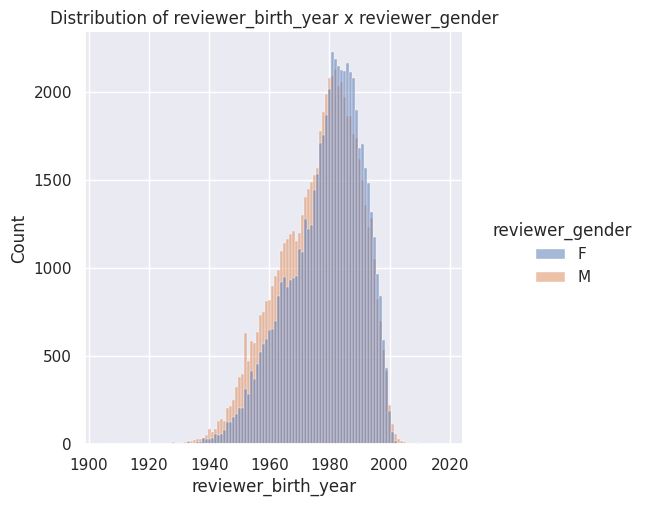

In [16]:
sns.displot(data=df_features, 
            x="reviewer_birth_year", 
            hue='reviewer_gender', 
            discrete=True).set(title='Distribution of reviewer_birth_year x reviewer_gender')

In [23]:
# Calcular média de idade por gênero

### 3.2. Target (Y) variable analysis 

*Check proportion of the target class:* 

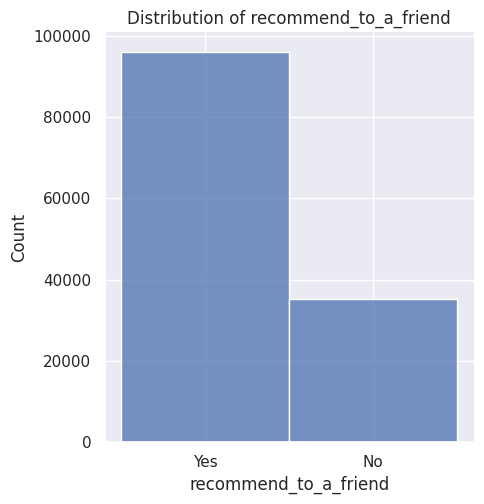

In [17]:
sns.displot(data=df_features, x="recommend_to_a_friend", discrete=True).set(title='Distribution of recommend_to_a_friend')

[Text(0.5, 1.0, 'Distribution of age x rating x recommended_ind')]

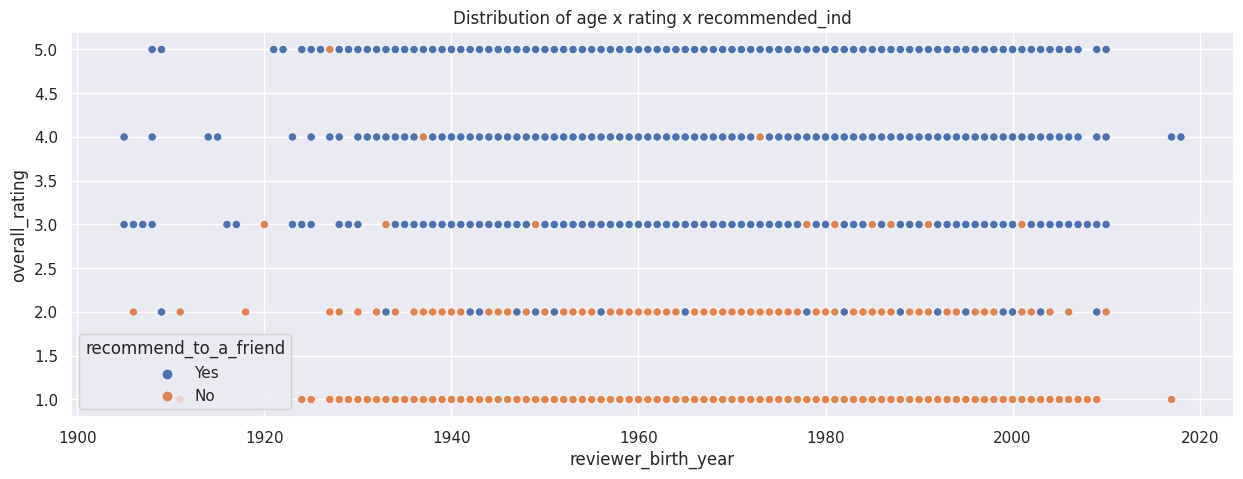

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=df_features, x="reviewer_birth_year", y="overall_rating", hue="recommend_to_a_friend").set(title='Distribution of age x rating x recommended_ind')

**Insigths:**
- Imbalanced dataset, where "Recommended" values are more dominating than "Not Recommended"
- From the profiling was clear that recommend_to_a_friend and overall_rating had a big correlation (~0.9)

### 3.3 Persona Analysis

Describing patterns and profiles about overall reviews and also clusters of detractors and promoters

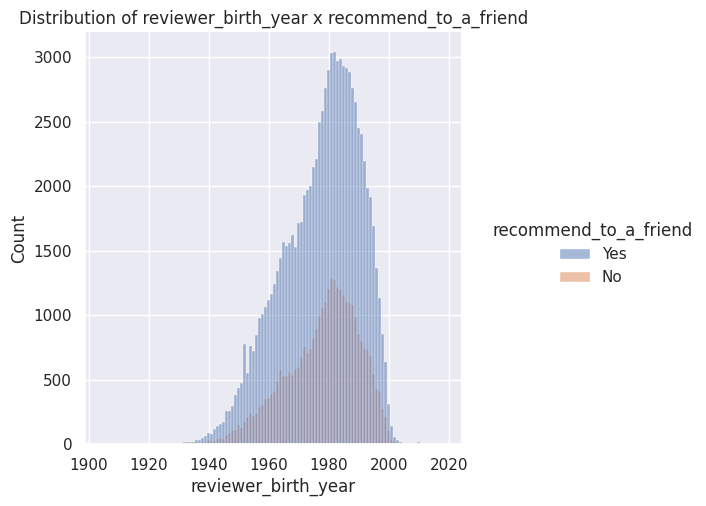

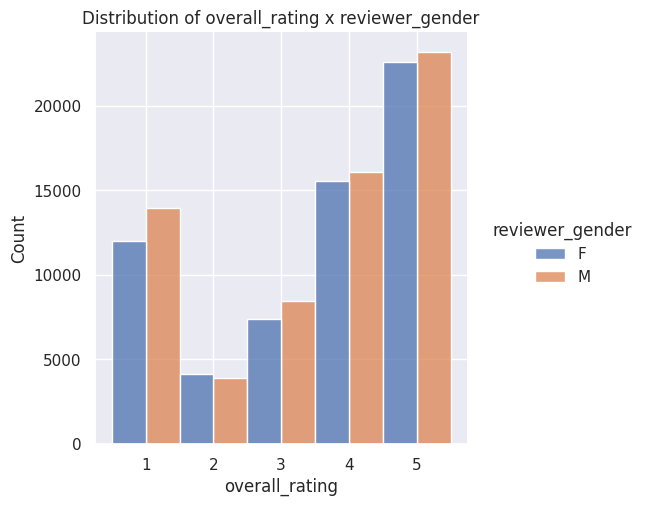

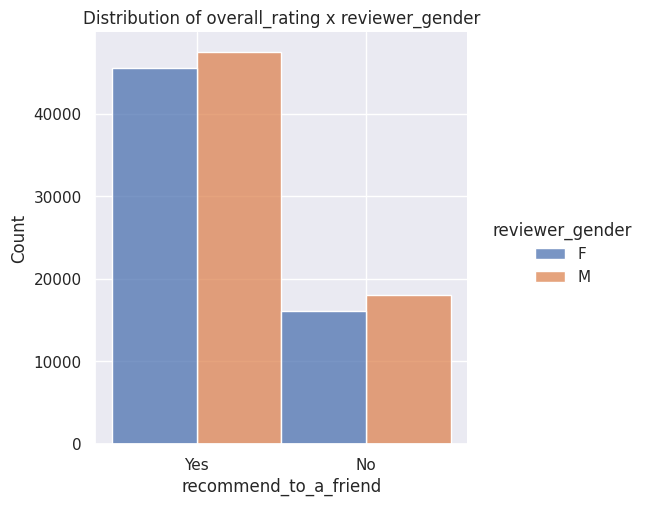

In [218]:
sns.displot(data=df_features, 
            x="reviewer_birth_year", 
            hue='recommend_to_a_friend', 
            discrete=True).set(title='Distribution of reviewer_birth_year x recommend_to_a_friend')
sns.displot(data=df_features, 
            x="overall_rating", 
            hue='reviewer_gender', 
            multiple="dodge", 
            discrete=True).set(title='Distribution of overall_rating x reviewer_gender')
sns.displot(data=df_features, 
            x="recommend_to_a_friend", 
            hue='reviewer_gender', 
            multiple="dodge", 
            discrete=True).set(title='Distribution of overall_rating x reviewer_gender')

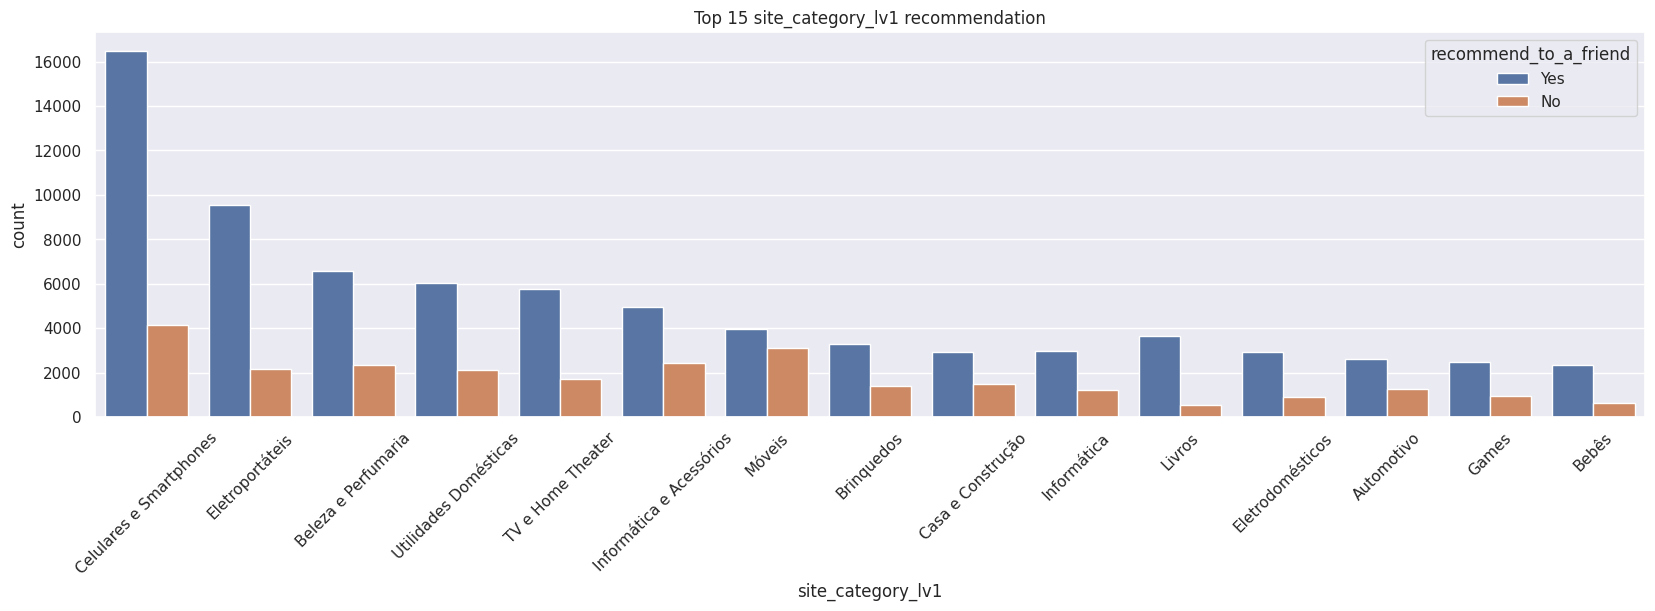

In [54]:
# Print top categories
fig, ax = plt.subplots(figsize=(20, 5))
 
# drawing the plot
sns.countplot(x='site_category_lv1', 
              data=df_features, 
              hue='recommend_to_a_friend', 
              order=df_features.site_category_lv1.value_counts().iloc[:15].index, 
              ax=ax).set(title='Top 15 site_category_lv1 recommendation')
plt.xticks(rotation=45)
plt.show()

**Insights:**
- The distribution of 'recomendation' looks pretty similar regarding age and sex
- However, the distribution of sentiment is not linear in the categories. Visually, "Móveis" has almost 50% of approval while livros has 90%

Creation of a sentiment feature, which is calculated by the (positive recommendation)/(total recommendation) in a subset

In [22]:
# Obtain the sentiment for each category based on the positive reviews / total reviews
def create_sentiment(df, column):
    no_df = df.loc[df['recommend_to_a_friend'] == 'No', column].value_counts().to_frame()
    yes_df = df.loc[df['recommend_to_a_friend'] == 'Yes', column].value_counts().to_frame()
    df_recom = pd.merge(no_df, yes_df, left_index=True, right_index=True, suffixes=('_no', '_yes'))
    df_recom['sentiment'] = df_recom[column+'_yes'] / (df_recom[column+'_yes'] + df_recom[column+'_no'])
    df_recom.sort_values(by='sentiment', ascending=False, inplace=True)
    df_recom['total'] = df_recom[column+'_yes'] + df_recom[column+'_no']
    return df_recom

df_site_category_lv1_recom = create_sentiment(df_features, 'site_category_lv1')
df_site_category_lv1_recom.head()

,site_category_lv1_no,site_category_lv1_yes,sentiment,total
Filmes e Séries,59,535,0.900673,594
Livros,533,3649,0.872549,4182
Livros Importados,11,70,0.864198,81
Música,39,217,0.847656,256
Artigos de Festa,1,5,0.833333,6


In [56]:
df_site_category_lv1_recom.sentiment.describe() 

count    50.000000
mean      0.696293
std       0.103159
min       0.482456
25%       0.655657
50%       0.711630
75%       0.747137
max       0.900673
Name: sentiment, dtype: float64

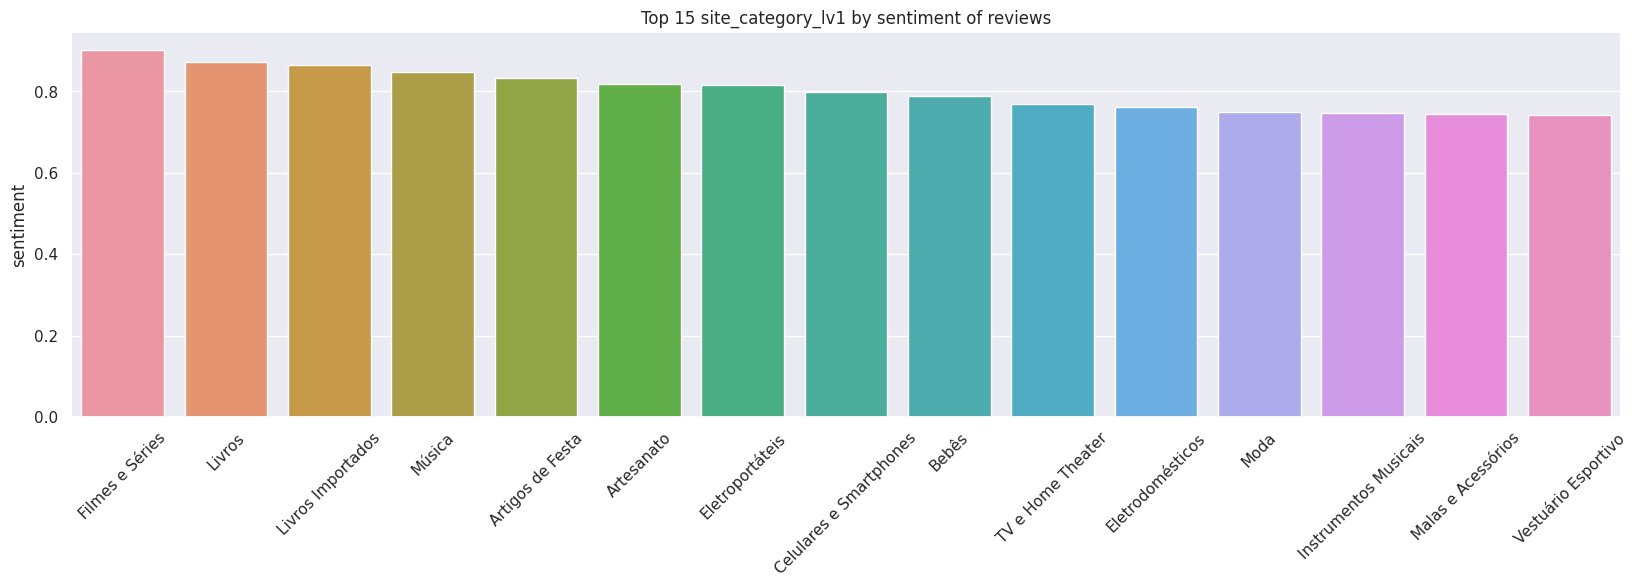

In [57]:
# Print top categories 
fig, ax = plt.subplots(figsize=(20, 5))
 
# drawing the plot
sns.barplot(data=df_site_category_lv1_recom,
            x=df_site_category_lv1_recom.index,
            y="sentiment",
            order=df_site_category_lv1_recom.sentiment.iloc[:15].index, 
            ax=ax).set(title='Top 15 site_category_lv1 by sentiment of reviews')
plt.xticks(rotation=45)
plt.show()

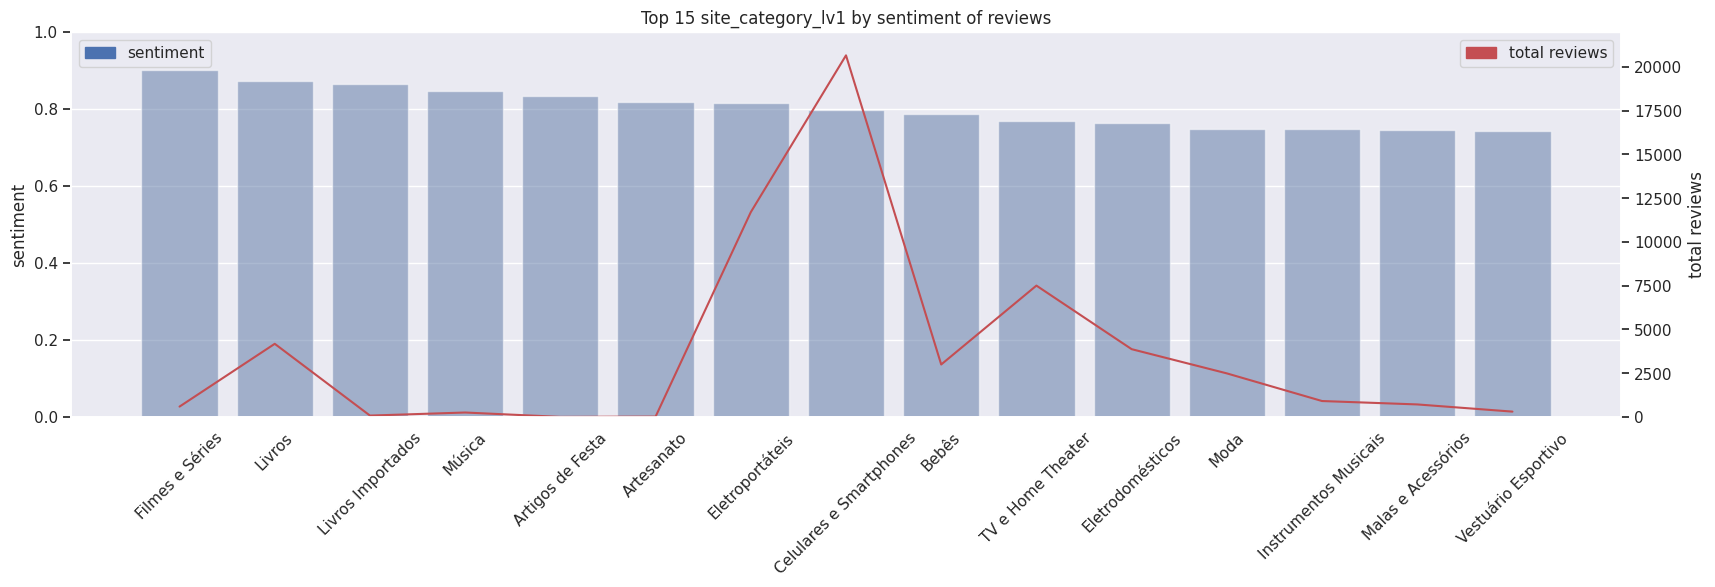

In [27]:
df_top_sentiment = df_site_category_lv1_recom[df_site_category_lv1_recom.index.isin(df_site_category_lv1_recom.sentiment.iloc[:15].index)]

def plot_sentiment(df, title, hue=None):
    fig, ax1 = plt.subplots(figsize=(20, 5))
    # plot line graph on axis #1
    ax1 = sns.barplot(
        x=df.index, 
        y='sentiment', 
        data=df,
        hue=hue,
        color='b',
        alpha=0.5
    )
    ax1.set_ylabel('sentiment')
    ax1.set_ylim(0, 1)
    ax1_patch = mpatches.Patch(color='b', label='sentiment')
    ax1.legend(handles=[ax1_patch], loc="upper left")
    # set up the 2nd axis
    ax1.tick_params('x', labelrotation=45)
    ax2 = ax1.twinx()
    # plot bar chart on axis #2
    sns.lineplot(
        x=df.index, 
        y='total', 
        data=df, 
        color='r',
    )
    ax2.set_ylabel('total reviews')
    ax2.set_ylim(0, 22000)
    ax2.grid(False)
    ax2_patch = mpatches.Patch(color='r', label='total reviews')
    ax2.legend(handles=[ax2_patch], loc="upper right")
    plt.title(title)
    plt.show()

plot_sentiment(df_top_sentiment, 'Top 15 site_category_lv1 by sentiment of reviews')

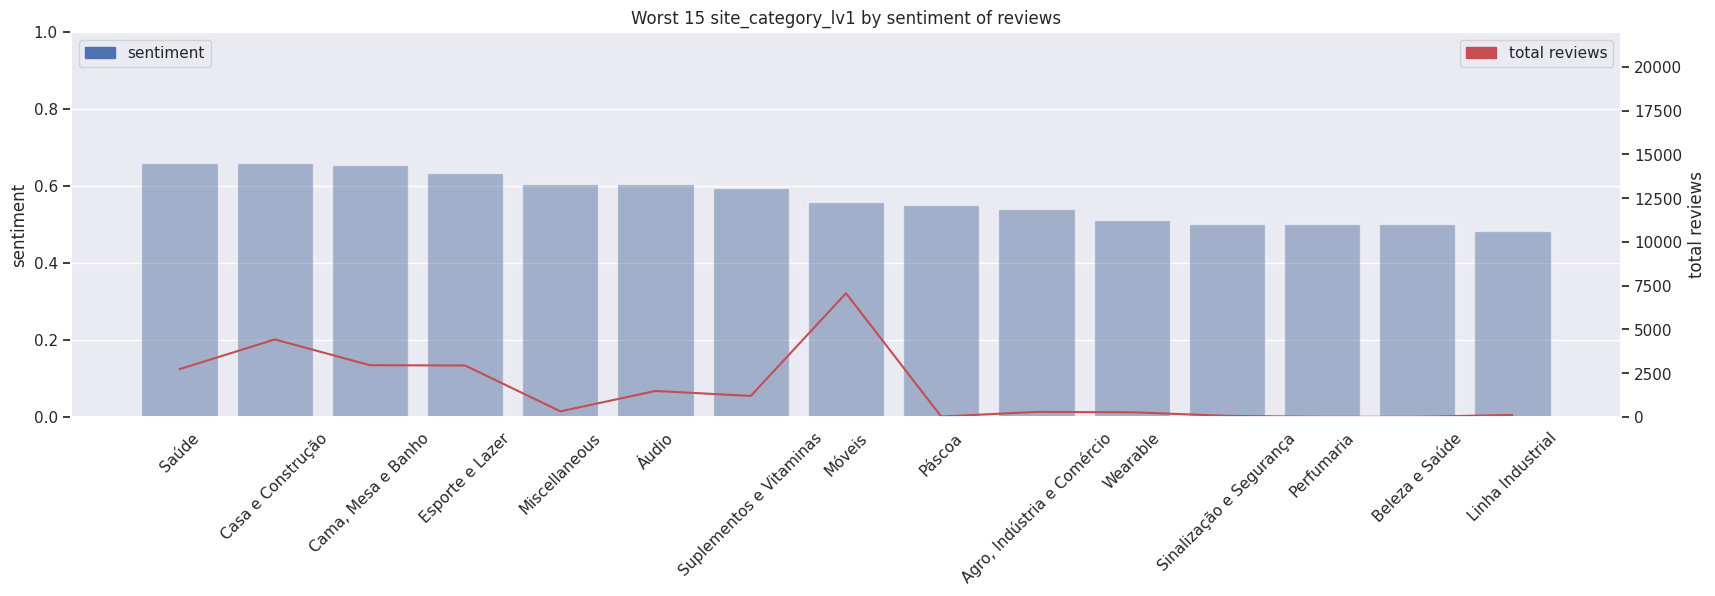

In [181]:
df_worst_sentiment = df_site_category_lv1_recom[df_site_category_lv1_recom.index.isin(df_site_category_lv1_recom.sentiment.iloc[-15:].index)]
plot_sentiment(df_worst_sentiment, 'Worst 15 site_category_lv1 by sentiment of reviews')

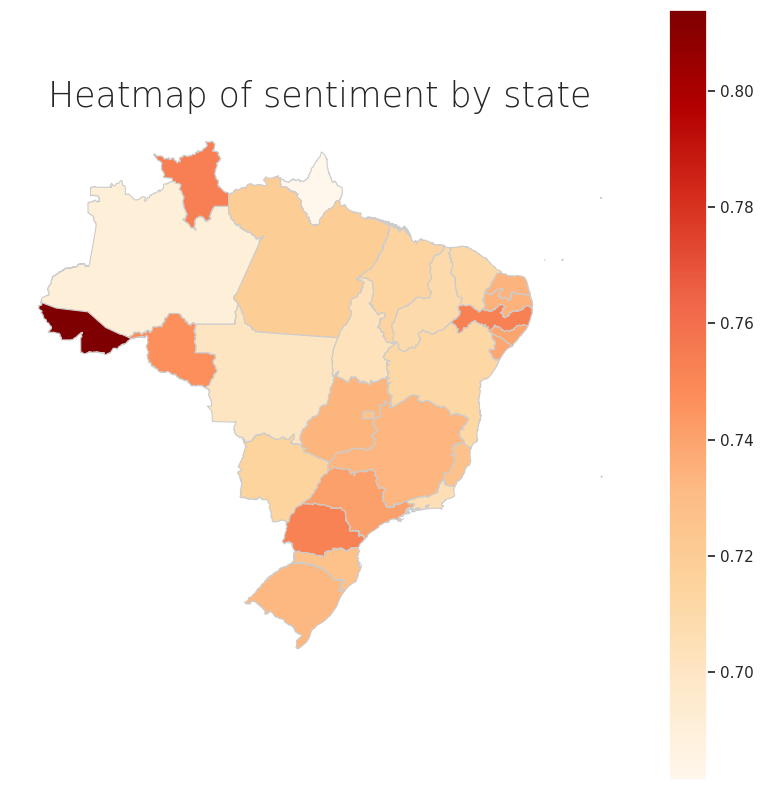

In [180]:
states_sentiment = create_sentiment(df_features, 'reviewer_state')
plot_heatmap(states_sentiment, column='sentiment', title='Heatmap of sentiment by state')

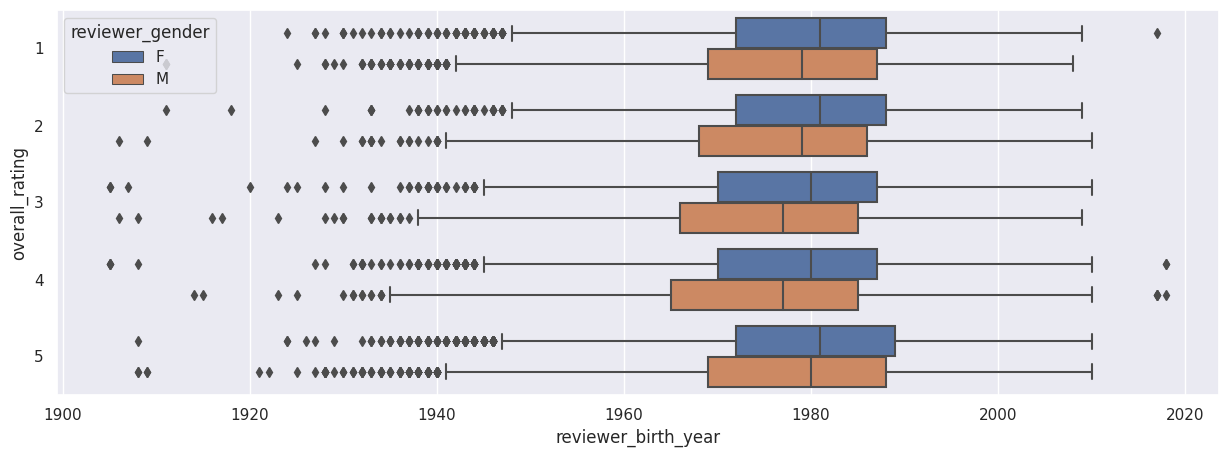

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="reviewer_birth_year", y="overall_rating",
            hue="reviewer_gender", orient="h",
            data=df_features)

plt.show()

**Insights:**
- Despite the close number of men and women reviewing, in the average men are older than women
- Younger people tend to have more extreme opinions
- Eletroportateis, Celulares e Smartphones, Eletrodomésticos, Livros e Bebês are promoters
- Móveis, Casa e Construção, Esporte e Lazer are detractors

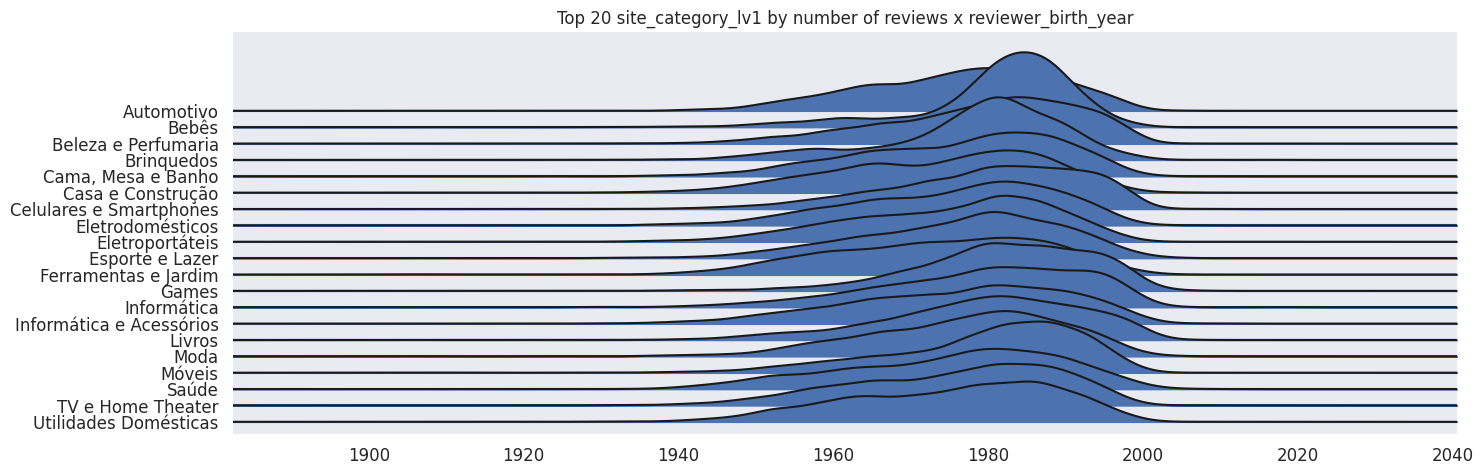

In [28]:
df_top_reviews = df_features[df_features.site_category_lv1.isin(df_features.site_category_lv1.value_counts().iloc[:20].index)]
fig, axes = joypy.joyplot(df_top_reviews, 
                          column="reviewer_birth_year", 
                          by="site_category_lv1",
                          overlap=1, 
                          figsize=(15, 5), 
                          title='Top 20 site_category_lv1 by number of reviews x reviewer_birth_year')

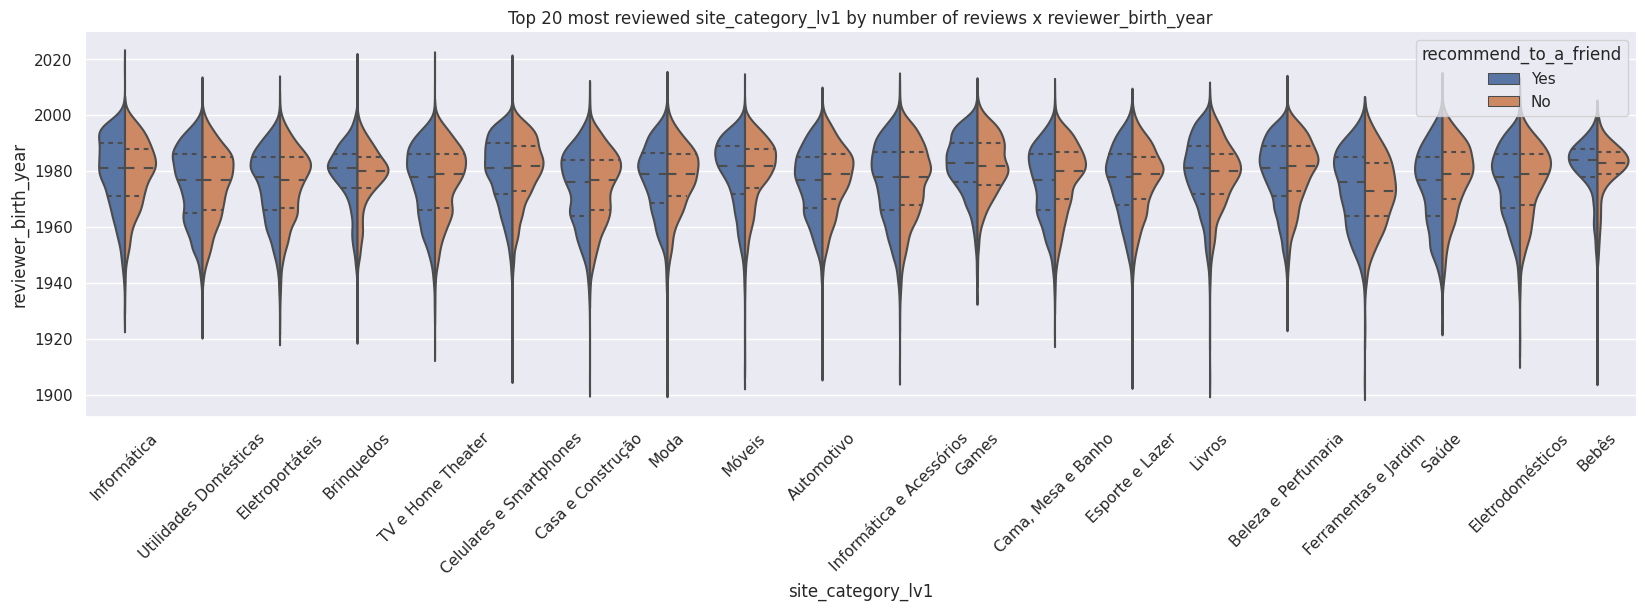

In [30]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(x="site_category_lv1", y="reviewer_birth_year",  hue="recommend_to_a_friend",
               split=True, inner="quart",
               data=df_top_reviews).set(title='Top 20 most reviewed site_category_lv1 by number of reviews x reviewer_birth_year')
sns.despine(left=True)
plt.xticks(rotation=45)
plt.show()


## 3.4 Timeseries Analysis

In [162]:
df_features['date'] = df_features['submission_date'].dt.date
by_date = pd.Series(df_features['date']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_date = by_date.rename_axis('date').reset_index(name='counts')
df_date.index = df_date['date']
df_date.drop(columns=['date'], inplace=True)
df_date['pos_recom'] = df_features[df_features['recommend_to_a_friend']=='Yes']['date'].value_counts().sort_index()
df_date['neg_recom'] = df_features[df_features['recommend_to_a_friend']=='No']['date'].value_counts().sort_index()

In [163]:
fig = px.line(df_date, x=df_date.index, y=['pos_recom', 'neg_recom'], title='Number of reviews by date')
fig.show()

## 4. Text Analysis
### 4.1 Overview

In [184]:
FreqOfWords = df['review_text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1000, height=600)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()



### 4.2 Data Cleaning

In [35]:
df_text = df_features.copy()

cols_delete = ['submission_date', 'reviewer_id', 'product_id', 'product_name', 'product_brand']
df_text.drop(columns=cols_delete, inplace=True)
df_text.dropna(inplace=True)

df_text['text_len'] = df_text['review_text'].astype(str).apply(len)
df_text['title_len'] = df_text['review_title'].astype(str).apply(len)

print('Percentage of reviews after cleaning: {} %'.format(100*len(df_text)/len(df_features)))

Percentage of reviews after cleaning: 90.18069171284175 %
